In [18]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
TRAIN_FILE = 'data/train.csv'
TEST_FILE = 'data/test.csv'

In [20]:
train_file = pd.read_csv(TRAIN_FILE)
print(train_file.head())
print(train_file.shape)
print(train_file.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(8

In [21]:
print(train_file.describe(include= 'all'))
print(train_file.isnull().sum())


        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

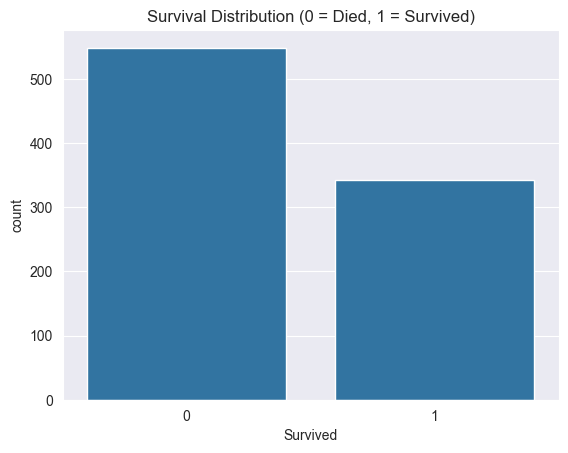

In [22]:
sns.countplot(data=train_file, x = 'Survived')
plt.title("Survival Distribution (0 = Died, 1 = Survived)")
plt.show()

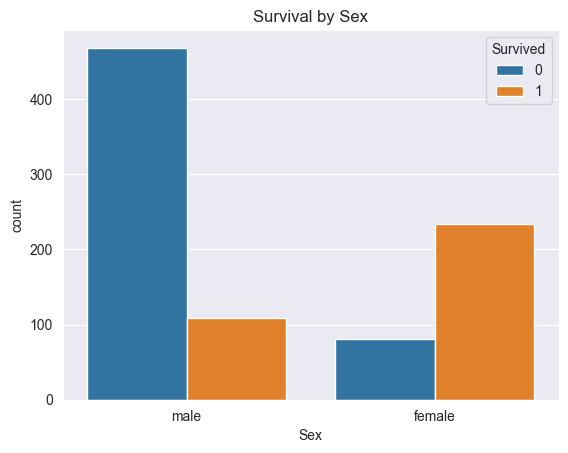

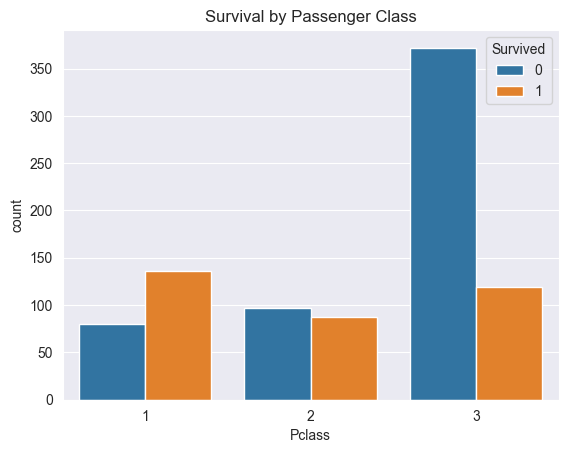

In [23]:
sns.countplot(data=train_file, x='Sex', hue='Survived')
plt.title("Survival by Sex")
plt.show()

sns.countplot(data=train_file, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.show()

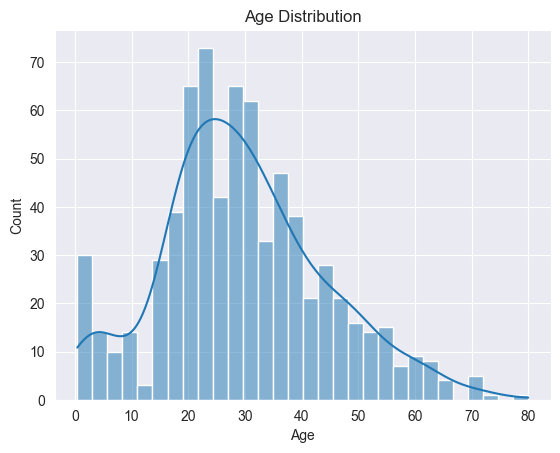

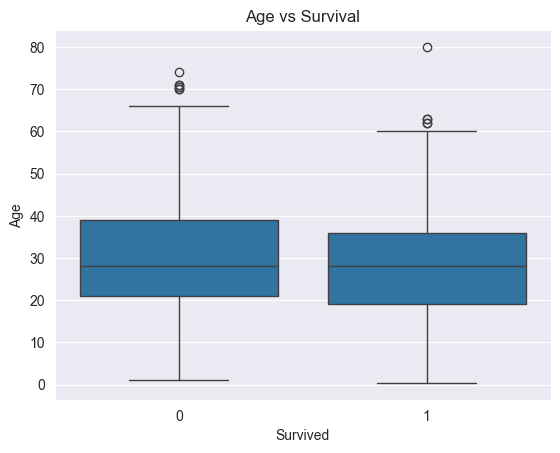

In [24]:
sns.histplot(train_file['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

sns.boxplot(x='Survived', y='Age', data=train_file)
plt.title("Age vs Survival")
plt.show()


Text(0.5, 1.0, 'Missing Data in Train Set')

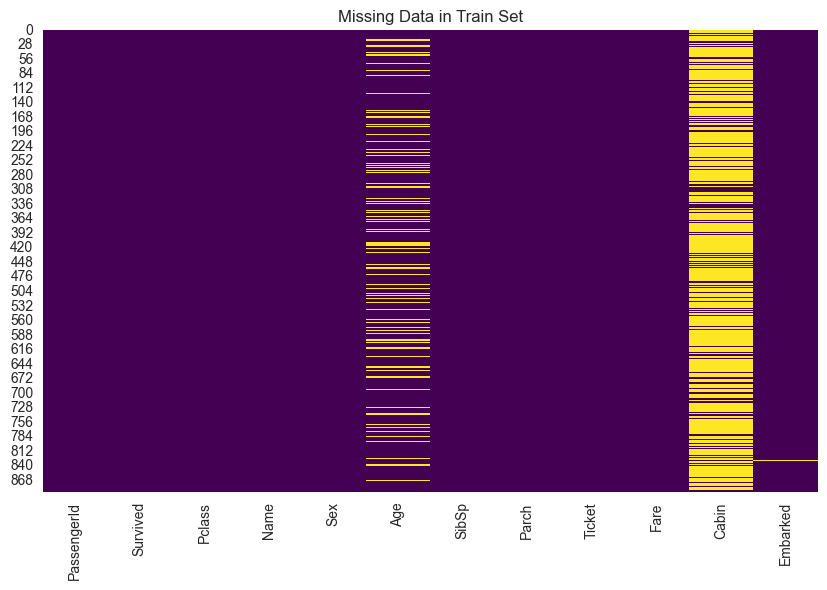

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(train_file.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data in Train Set")

In [26]:
test_file = pd.read_csv(TEST_FILE)
print("Train Columns:", train_file.columns.to_list())
print("Test Columns:", test_file.columns.to_list())
print("Columns that dont exist in Test: ", set(train_file.columns.to_list()) - set(test_file.columns.tolist()))

Train Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Test Columns: ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Columns that dont exist in Test:  {'Survived'}


In [27]:
#FIXING DATA
missing_stats = train_file.isnull().sum()
print(missing_stats[missing_stats > 0])

Age         177
Cabin       687
Embarked      2
dtype: int64


In [28]:
train_file['Age'].fillna(train_file['Age'].median(), inplace=True)

train_file['Embarked'].fillna(train_file['Embarked'].mode()[0], inplace= True)


train_file.drop(columns= ['Cabin', 'Ticket', 'Name'], inplace= True)

train = pd.get_dummies(train_file, columns=['Sex', 'Embarked'], drop_first=True)



C:\Users\Mahra\AppData\Local\Temp\ipykernel_58732\1608216204.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_file['Age'].fillna(train_file['Age'].median(), inplace=True)
C:\Users\Mahra\AppData\Local\Temp\ipykernel_58732\1608216204.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

x = train.drop(columns = ['Survived', 'PassengerId'])
y = train['Survived']
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)


In [30]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier( eval_metric='logloss', random_state=42)
}


In [31]:
results = []
for name, model in models.items():
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_ped = model.predict_proba(X_val)[:,1]
    
    results.append(
        {
            'Model' : name,
            'Accuracy' : accuracy_score(y_val, y_pred) ,
            'F1 Score': f1_score(y_val, y_pred),
            'AUC': roc_auc_score(y_val, y_ped)

        }
    )
    
results_df = pd.DataFrame(results)

print(results_df.sort_values(by= 'AUC', ascending= False).reset_index(drop=True))
    

                 Model  Accuracy  F1 Score       AUC
0        Random Forest  0.821229  0.777778  0.886873
1  Logistic Regression  0.810056  0.763889  0.882497
2              XGBoost  0.804469  0.761905  0.879665


In [32]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer

# Setup CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Scorers
f1 = make_scorer(f1_score)
auc = make_scorer(roc_auc_score, needs_proba=True)

# Results list
cv_results = []

for name, model in models.items():
    acc_scores = cross_val_score(model, x, y, cv=cv, scoring='accuracy')
    f1_scores = cross_val_score(model, x, y, cv=cv, scoring=f1)
    auc_scores = cross_val_score(model, x, y, cv=cv, scoring=auc)

    cv_results.append({
        'Model': name,
        'CV Accuracy (mean)': acc_scores.mean(),
        'CV F1 Score (mean)': f1_scores.mean(),
        'CV AUC (mean)': auc_scores.mean()
    })

# Display results
cv_df = pd.DataFrame(cv_results)
print(cv_df.sort_values(by='CV AUC (mean)', ascending=False).reset_index(drop=True))


C:\Users\Mahra\miniconda3\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mahra\miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
  File "C:\Users\Mahra\miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Mahra\miniconda3\envs\ml\lib\site-packages\sklearn\utils\_param_validation.py", line 194, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "C:\Users\Mahra\miniconda3\envs\ml\lib\inspect.py", line 3186, in bind
    return self._bind(args, kwargs)
  File "C:\Users\Mahra\miniconda3\envs\ml\lib\inspect.py", line 3175, in _bind
    raise TypeError(
TypeError: got an unexpected keyword argument 'needs

                 Model  CV Accuracy (mean)  CV F1 Score (mean)  CV AUC (mean)
0  Logistic Regression            0.792392            0.723115            NaN
1        Random Forest            0.823759            0.765601            NaN
2              XGBoost            0.826000            0.769285            NaN


C:\Users\Mahra\miniconda3\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Mahra\miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
  File "C:\Users\Mahra\miniconda3\envs\ml\lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "C:\Users\Mahra\miniconda3\envs\ml\lib\site-packages\sklearn\utils\_param_validation.py", line 194, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "C:\Users\Mahra\miniconda3\envs\ml\lib\inspect.py", line 3186, in bind
    return self._bind(args, kwargs)
  File "C:\Users\Mahra\miniconda3\envs\ml\lib\inspect.py", line 3175, in _bind
    raise TypeError(
TypeError: got an unexpected keyword argument 'needs

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Scorer
f1 = make_scorer(f1_score)

# Logistic Regression
logreg_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

logreg_grid = GridSearchCV(LogisticRegression(max_iter=1000), logreg_params, scoring=f1, cv=5)
logreg_grid.fit(x, y)

#  Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, scoring=f1, cv=5)
rf_grid.fit(x, y)

# XGBoost
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb_grid = GridSearchCV(XGBClassifier(eval_metric='logloss', random_state=42), xgb_params, scoring=f1, cv=5)
xgb_grid.fit(x, y)

# Print best results
print(" Logistic Regression Best:", logreg_grid.best_params_, "F1:", logreg_grid.best_score_)
print(" Random Forest Best:", rf_grid.best_params_, "F1:", rf_grid.best_score_)
print(" XGBoost Best:", xgb_grid.best_params_, "F1:", xgb_grid.best_score_)


 Logistic Regression Best: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'} F1: 0.7194534993587856
 Random Forest Best: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100} F1: 0.7662924291570589
 XGBoost Best: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8} F1: 0.7778102093795811


NameError: name 'val_inputs' is not defined